<a href="https://colab.research.google.com/github/rajarishiR/programm/blob/main/corrected_chennai_house_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**


**Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?**

**Minimum Requirements:**


**It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install klib
import klib
import warnings
import plotly.express as px

In [2]:
df = pd.read_csv('/content/train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**According to the given data for now we can say its a Regression problem since its target (sales_price) is a continious value 
 ,Before going into the machine learning part for now we will start to clean the entire data.**

# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
df.shape

(7109, 22)

In [7]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

# Column PRT_ID

In [8]:
# Removing the PRT_ID column cause it can affect my model
del df['PRT_ID']

# Column Area
**We are going to correct all the spelling mistakes in the column, so its an text data cleaning**

In [9]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [10]:
df.AREA = df.AREA.map({'Karapakkam':'karapakkam', 'Anna Nagar':'Anna Nagar', 'Adyar':'Adyar', 'Velachery':'velachery', 'Chrompet':'chrompet',
       'KK Nagar':'KK Nagar', 'TNagar':'T.Nagar', 'T Nagar':'T.Nagar', 'Chrompt':'chrompet', 'Chrmpet':'chrompet', 'Karapakam':'karapakkam',
       'Ana Nagar':'Anna Nagar', 'Chormpet':'chrompet', 'Adyr':'Adyar', 'Velchery':'velachery', 'Ann Nagar':'Anna Nagar',
       'KKNagar':'KK Nagar'})

In [11]:
df.AREA.unique()

array(['karapakkam', 'Anna Nagar', 'Adyar', 'velachery', 'chrompet',
       'KK Nagar', 'T.Nagar'], dtype=object)

# column sale.date
**To clean the sale.date column we have to use date time package**
**From the sale date and bulid date we can calucate the age or duration of the house**

In [12]:
# Dealing with Date and time
import datetime
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)
df.DATE_BUILD = df.DATE_BUILD.dt.year
df.DATE_SALE = df.DATE_SALE.dt.year
df['House_age'] = df.DATE_SALE-df.DATE_BUILD

In [13]:
df = df.drop(columns=['DATE_BUILD','DATE_SALE'])


In [14]:
a = df.pop('House_age')
df.insert(2,'House_age',a)
df.head()

,AREA,INT_SQFT,House_age,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,karapakkam,1004,44,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,11,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,20,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,velachery,1855,22,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,karapakkam,1226,30,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# Column N_Bedroom
**since N_BEDROOM column has  one Nan values we will be imputing it and we will convert the float values into int.**

In [15]:
df['N_BEDROOM'] = df['N_BEDROOM'].replace(np.nan, df.N_BEDROOM.mode().values[0])
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int64')# Converting all float vals to int 

# Column N_BATHROOM
**This column has 5 missing values we will be imputing them and covert it into int**

In [16]:
df['N_BATHROOM'] = df['N_BATHROOM'].replace(np.nan, df.N_BATHROOM.mode().values[0]) 
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int64')# Converting all float vals to int

# Column sale_condition
**correcting the spell mistake**

In [17]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [18]:
df.SALE_COND = df.SALE_COND.map({'AbNormal':'Abnormal','Partial':'Partial', 'AdjLand':'Adj_land', 'Normal Sale':'Normal_scale',
       'Ab Normal':'Abnormal', 'Partiall':'Partial', 'Adj Land':'Adj_land', 'PartiaLl':'Partial','Family':'Family'})
df.SALE_COND.value_counts()

Adj_land        1439
Partial         1433
Normal_scale    1423
Abnormal        1411
Family          1403
Name: SALE_COND, dtype: int64

# Column PARK_FACIL
**Since its a binary catagorical column we will be doing label encoding**

In [19]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [20]:
df.PARK_FACIL = df.PARK_FACIL.map({'Yes':1, 'No':0, 'Noo':0})

# Column BUILDTYPE


In [21]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [22]:
df.BUILDTYPE = df.BUILDTYPE.map({'Commercial':'Commercial', 'Others':'Others', 'Other':'Others', 'House':'Housing', 'Comercial':'Commercial'})
df.BUILDTYPE.value_counts()

Housing       2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

# Column UTILITY_AVAIL
**Correcting the spelling mistake**

In [23]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [24]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'})
df.UTILITY_AVAIL.value_counts() 

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

# Column STREET
**Label encoding**

In [25]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [26]:
df.STREET = df.STREET.map({'Paved':3, 'Gravel':2, 'No Access':1, 'Pavd':3, 'NoAccess':1})
df.STREET.value_counts()

3    2572
2    2520
1    2017
Name: STREET, dtype: int64

# Column QS_ROOMS	,QS_BATHROOM	,QS_BEDROOM , QS_OVERALL
**These columns are masked data we dont know its purpose. we will be cleaning and converting all the four columns into int**

In [27]:
df['QS_OVERALL'] = df['QS_OVERALL'].replace(np.nan, df.QS_OVERALL.mean()) 

In [28]:
df['QS_ROOMS'] = df['QS_ROOMS'].astype('int64')
df['QS_BATHROOM'] = df['QS_BATHROOM'].astype('int64')
df['QS_BEDROOM'] = df['QS_BEDROOM'].astype('int64')
df['QS_OVERALL'] = df['QS_OVERALL'].astype('int64')

In [29]:
df.head()

,AREA,INT_SQFT,House_age,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,karapakkam,1004,44,131,1,1,3,Abnormal,1,Commercial,AllPub,3,A,4,3,4,4,380000,144400,7600000
1,Anna Nagar,1986,11,26,2,1,5,Abnormal,0,Commercial,AllPub,2,RH,4,4,2,3,760122,304049,21717770
2,Adyar,909,20,70,1,1,3,Abnormal,1,Commercial,ELO,2,RL,4,3,2,3,421094,92114,13159200
3,velachery,1855,22,14,3,2,5,Family,0,Others,NoSewr,3,I,4,3,3,4,356321,77042,9630290
4,karapakkam,1226,30,84,1,1,3,Abnormal,1,Others,AllPub,2,C,3,2,4,3,237000,74063,7406250


# Removing REG_FEE , COMMIS column cause the are not needed for performing the ml

In [30]:
del df['REG_FEE']
del df['COMMIS']

In [31]:
df.groupby('AREA')['INT_SQFT'].mean()

AREA
Adyar          958.166667
Anna Nagar    1752.998731
KK Nagar      1903.332999
T.Nagar       1759.576846
chrompet      1003.254994
karapakkam    1103.406296
velachery     1741.293578
Name: INT_SQFT, dtype: float64

# Exploring , visuvalizing and encoding the data.

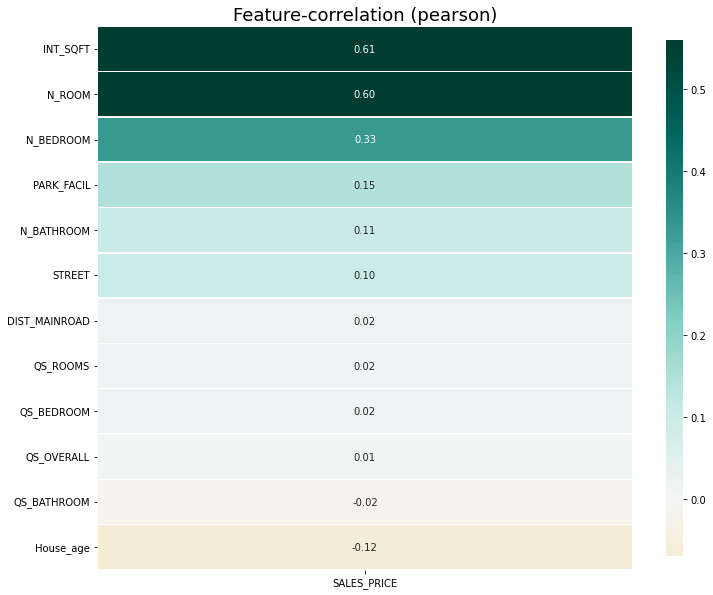

In [32]:
klib.corr_plot(df, target='SALES_PRICE');

**1. It shows there is a good correlation with int_sqft and n_rooms**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

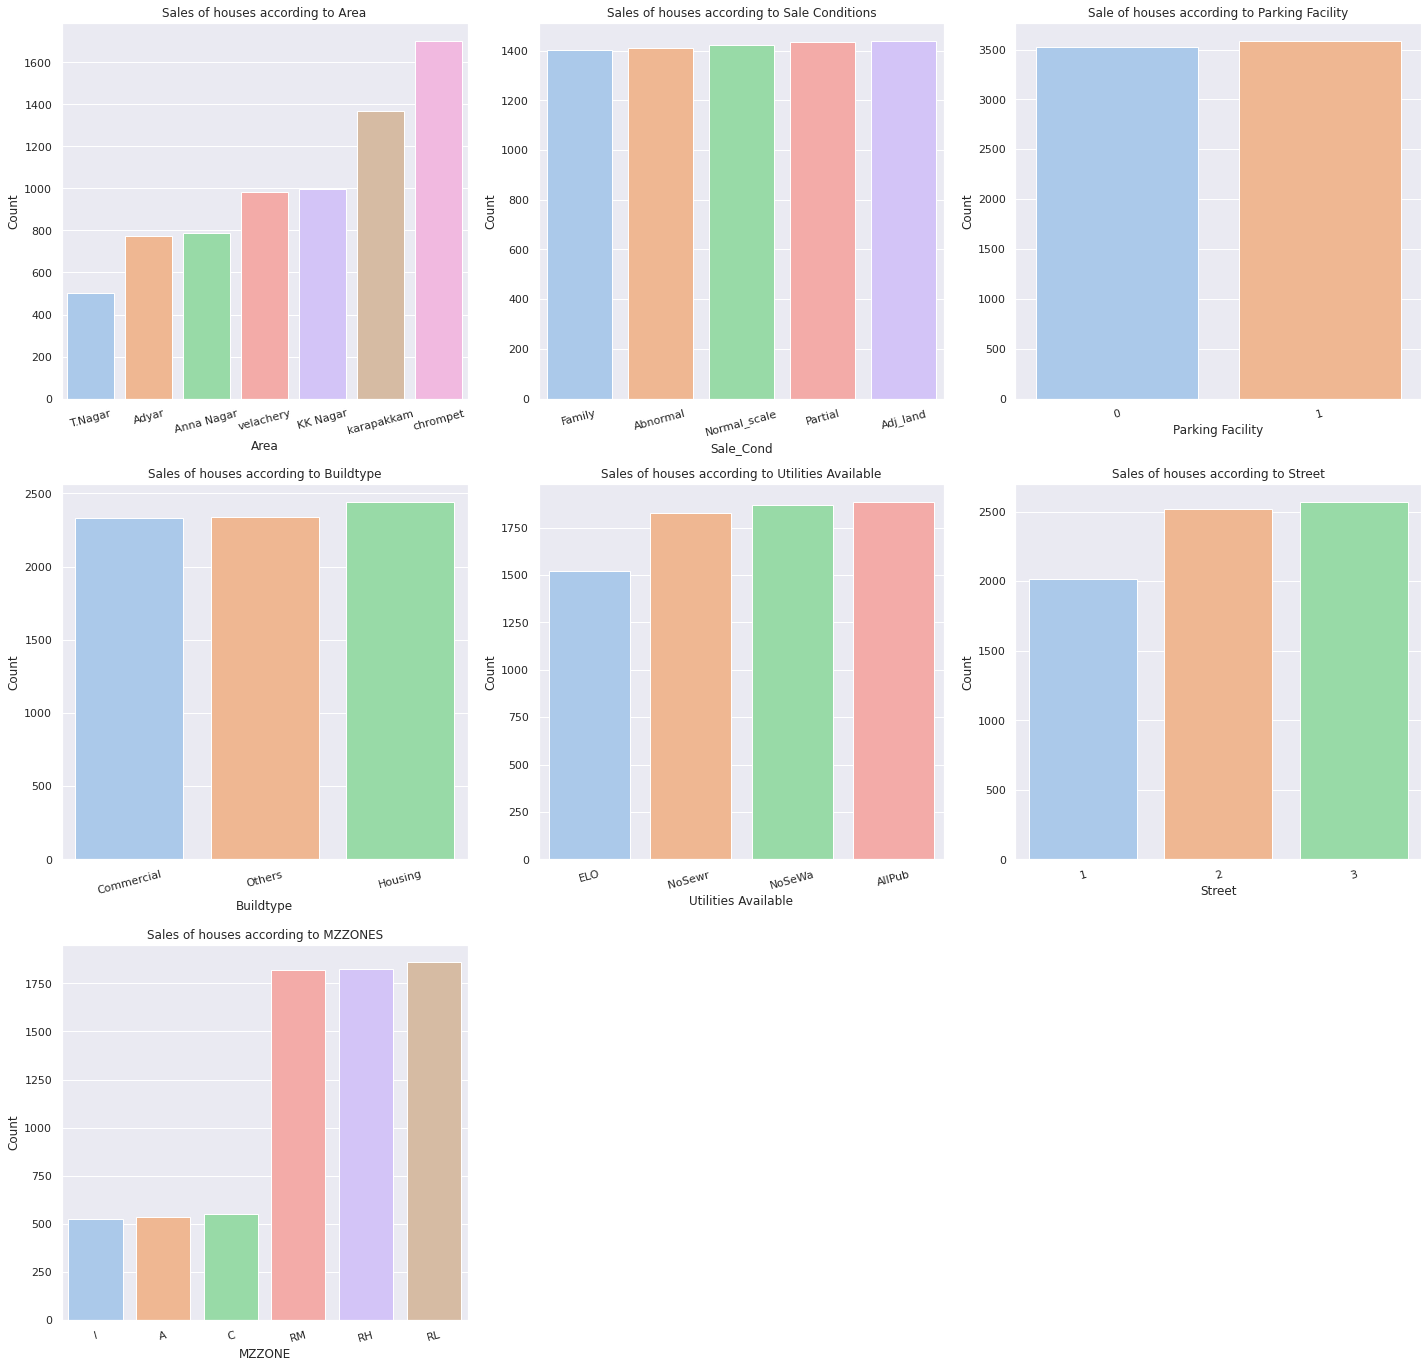

In [33]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['AREA'],order=df['AREA'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')

plt.subplot(432)
sns.countplot(df['SALE_COND'],order=df['SALE_COND'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Sale_Cond')
plt.ylabel('Count')
plt.title('Sales of houses according to Sale Conditions')

plt.subplot(433)
sns.countplot(df['PARK_FACIL'],order=df['PARK_FACIL'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Count')
plt.title('Sale of houses according to Parking Facility')

plt.subplot(434)
sns.countplot(df['BUILDTYPE'],order=df['BUILDTYPE'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Buildtype')
plt.ylabel('Count')
plt.title('Sales of houses according to Buildtype')

plt.subplot(435)
sns.countplot(df['UTILITY_AVAIL'],order=df['UTILITY_AVAIL'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Count')
plt.title('Sales of houses according to Utilities Available')

plt.subplot(436)
sns.countplot(df['STREET'],order=df['STREET'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Count')
plt.title('Sales of houses according to Street')

plt.subplot(437)
sns.countplot(df['MZZONE'],order=df['MZZONE'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Count')
plt.title('Sales of houses according to MZZONES')

plt.tight_layout()

**Countplot for all the categorical value.**



Interpretations :


 1.) In column "AREA" the highest number of houses sold were in the area "Chrompet".



 2.) In "SALE_COND", all the categories has high impact on the sales of house.
 
 
 3.) In "PARK_FACIL", houses with parking facilities are slightly sold more.
 
 
 4.) In "BUILDTYPE", houses used for living are sold more than using it as commercial or other spaces.
 
 
 5.) In "UTILITY_AVAIL", houses all public facility are most sold.
 
 
 6.) In "STREET", paved street and gravel street are more sold compared to houses with no access to street.
 
 
 7.) According to the column "MZZONE", Zones such as RL, RH, RM are the zones where the most number of houses got sold.
 

 **column area.**

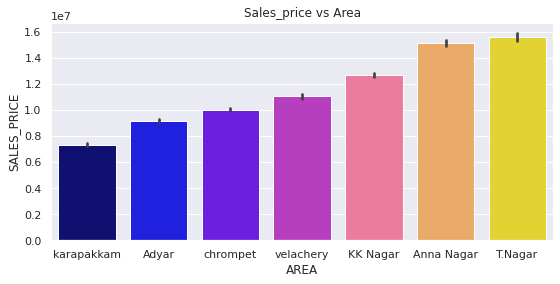

In [34]:
plt.figure(figsize=(9,4))
sns.barplot(data=df, x='AREA',y='SALES_PRICE', order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'], palette='gnuplot2')
plt.title("Sales_price vs Area")
plt.show()

 **AREA vs SALES_ PRICE graph .**

 
**1. There is a linear Trend between area and the price of the house.**




**2. This graph shows that each area has different prices.**






**3. Since price varies based on the area we can do a label encoding based on the order.**


**4.T.NAGAR area is more expensive than all the given areas and Karapakkam area is less expensive than all the given areas.**

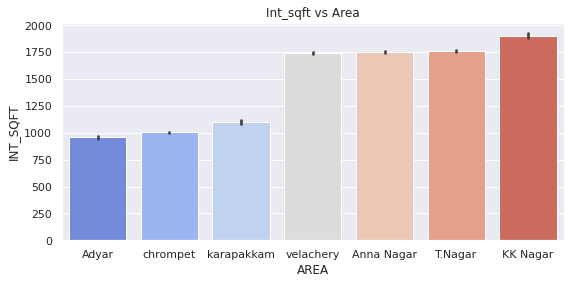

In [35]:
plt.figure(figsize=(9,4))
sns.barplot(data=df, x='AREA',y='INT_SQFT', order=df.groupby('AREA')['INT_SQFT'].mean().reset_index().sort_values('INT_SQFT')['AREA'], palette='coolwarm')
plt.title("Int_sqft vs Area")
plt.show()

**Int_sqft vs Area**


**1 . It shows that more bigger houses are in KK nagar.**


**2. It shows that velachery , anna nagar, T.nagar has no big difference house sizes.**


**3. Homes in adayar will be small when compared to all the areas given.**

In [36]:
df.head()

,AREA,INT_SQFT,House_age,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,karapakkam,1004,44,131,1,1,3,Abnormal,1,Commercial,AllPub,3,A,4,3,4,4,7600000
1,Anna Nagar,1986,11,26,2,1,5,Abnormal,0,Commercial,AllPub,2,RH,4,4,2,3,21717770
2,Adyar,909,20,70,1,1,3,Abnormal,1,Commercial,ELO,2,RL,4,3,2,3,13159200
3,velachery,1855,22,14,3,2,5,Family,0,Others,NoSewr,3,I,4,3,3,4,9630290
4,karapakkam,1226,30,84,1,1,3,Abnormal,1,Others,AllPub,2,C,3,2,4,3,7406250


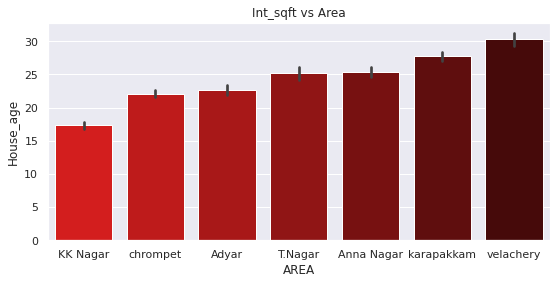

In [37]:
plt.figure(figsize=(9,4))
sns.barplot(data=df, x='AREA',y='House_age', order=df.groupby('AREA')['House_age'].mean().reset_index().sort_values('House_age')['AREA'], palette='flag')
plt.title("Int_sqft vs Area")
plt.show()

**Area vs House_age**


**1. This plot clearly shows that more older houses are present in velachery than any other given area, and it makes sense cause velachery is one of the most oldest city formed in chennai.**


**2. KK nagar has less old homes it means it has more new homes since it has more houses .**

In [38]:
df.columns

Index(['AREA', 'INT_SQFT', 'House_age', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

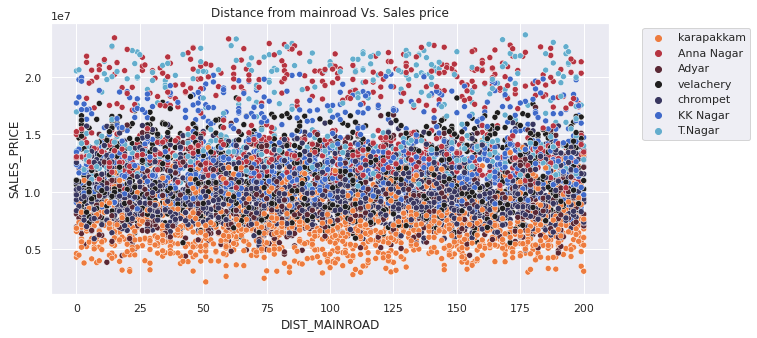

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE', data=df, hue='AREA', palette='icefire_r')
plt.title("Distance from mainroad Vs. Sales price")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

**Dist_mainroad vs Area**


**1. It shows that more homes are 200 kms away from the homes .**


**2. It doesnt show any linear relation with the plot.**

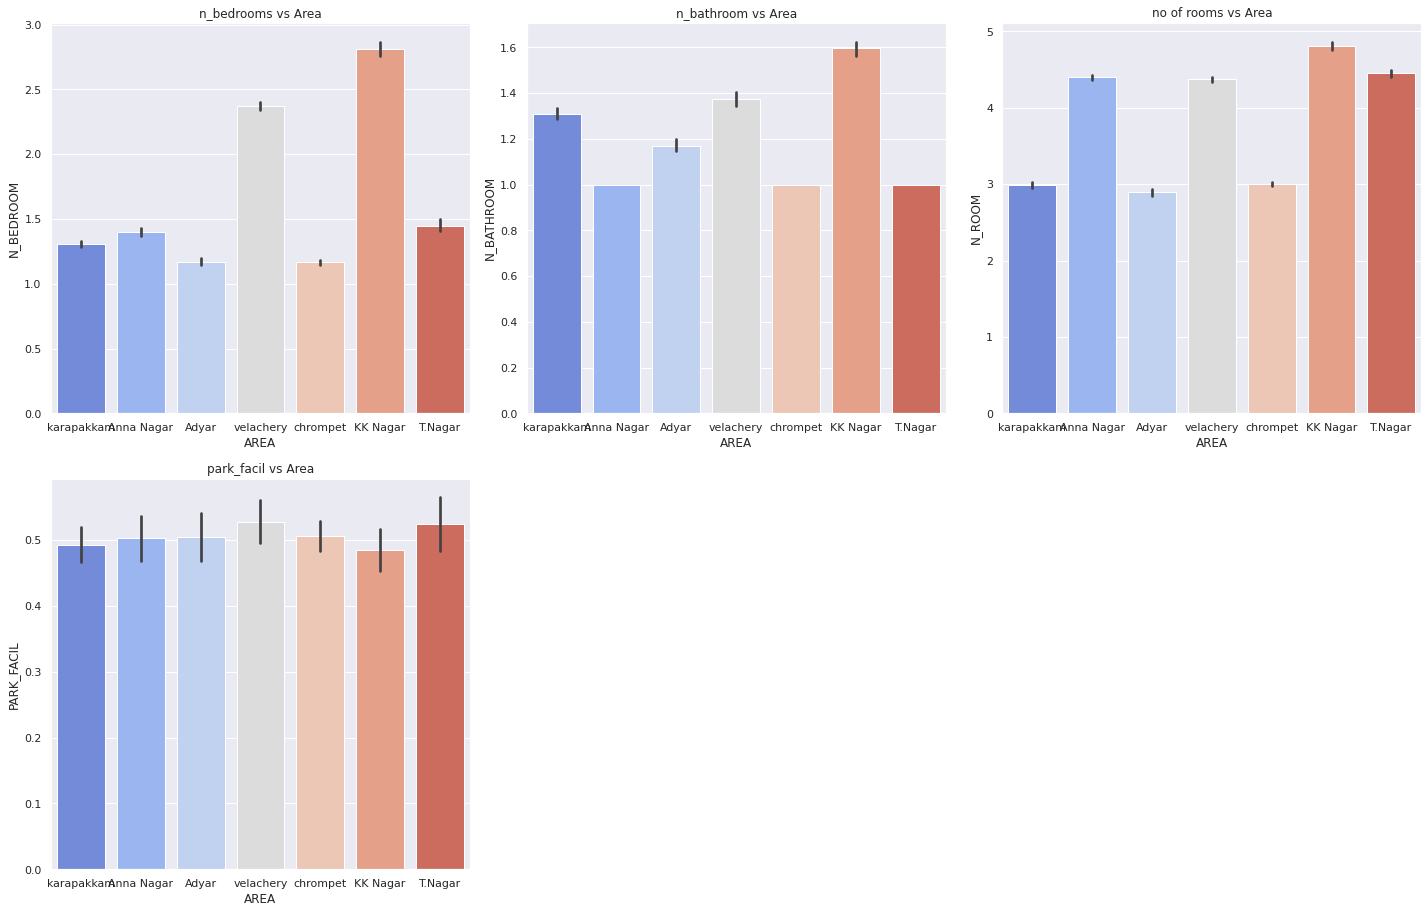

In [40]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.barplot(data=df, x='AREA',y='N_BEDROOM', palette='coolwarm')
plt.title("n_bedrooms vs Area")

plt.subplot(432)
sns.barplot(data=df, x='AREA',y='N_BATHROOM', palette='coolwarm')
plt.title("n_bathroom vs Area")

plt.subplot(433)
sns.barplot(data=df, x='AREA',y='N_ROOM', palette='coolwarm')
plt.title("no of rooms vs Area")

plt.subplot(434)
sns.barplot(data=df, x='AREA',y='PARK_FACIL', palette='coolwarm')
plt.title("park_facil vs Area")



plt.tight_layout()

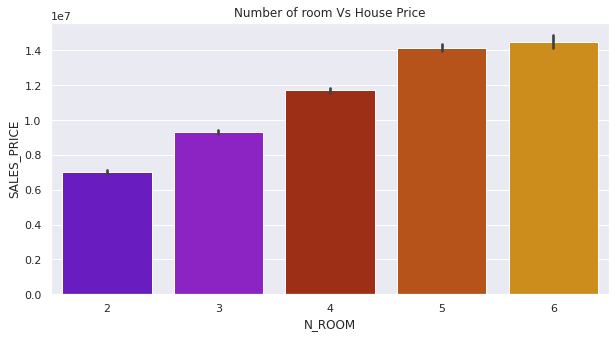

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='N_ROOM',y='SALES_PRICE', order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'] , palette='gnuplot')
plt.title("Number of room Vs House Price")
plt.show()

**sales_price vs N_rooms**


**1. This shows that price of the homes increases when there is increase in no fo rooms .**

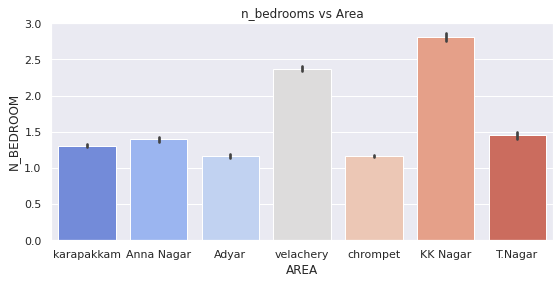

In [42]:
plt.figure(figsize=(9,4))
sns.barplot(data=df, x='AREA',y='N_BEDROOM', palette='coolwarm')
plt.title("n_bedrooms vs Area")
plt.show()

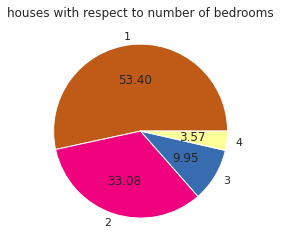

In [43]:
sns.set_palette('Accent_r')
df.N_BEDROOM.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("houses with respect to number of bedrooms")
plt.ylabel('')
plt.show()

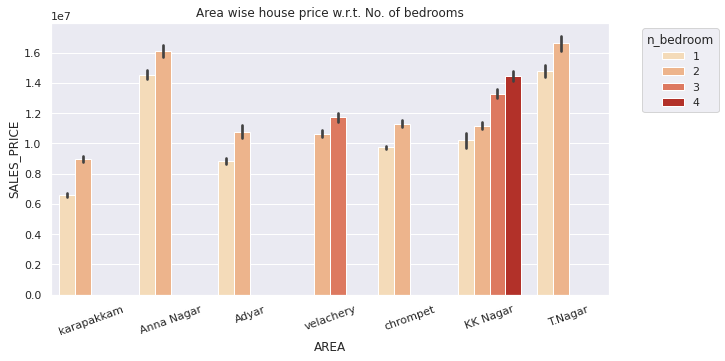

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x='AREA',y='SALES_PRICE', data=df, hue='N_BEDROOM', palette='OrRd')
plt.title("Area wise house price w.r.t. No. of bedrooms")
plt.xticks(rotation=20)
plt.legend(title='n_bedroom',bbox_to_anchor=(1.05,1))
plt.show()

**salesprice vs area with respect to no of bedrooms.**


 **1.KK nagar has more 4 bedroom houses than any other houses in the given area.**


**2.T.nagar has more 2 bedroom houses and yet they are more expensive than all  4 bedroom houses present in KK nagar**


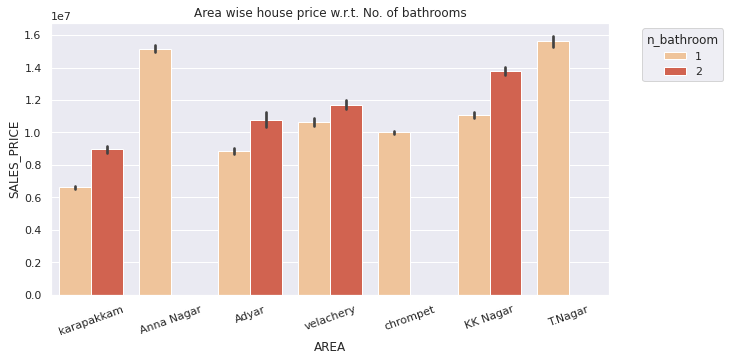

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x='AREA',y='SALES_PRICE', data=df, hue='N_BATHROOM', palette='OrRd')
plt.title("Area wise house price w.r.t. No. of bathrooms")
plt.xticks(rotation=20)
plt.legend(title='n_bathroom',bbox_to_anchor=(1.05,1))
plt.show()

**1. T.Nagar has more single bathrooms house.**


**2. KK.Nagar has more 2 bathroom houses.**


**3. velachery has good no of houses with both single and double bathroom homes.**

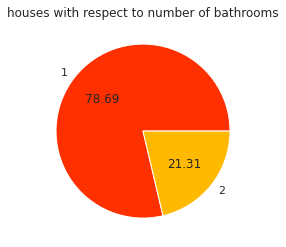

In [46]:
sns.set_palette('jet_r')
df.N_BATHROOM.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("houses with respect to number of bathrooms")
plt.ylabel('')
plt.show()

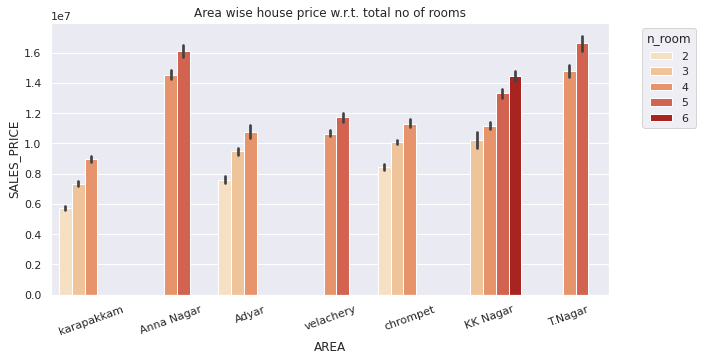

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x='AREA',y='SALES_PRICE', data=df, hue='N_ROOM', palette='OrRd')
plt.title("Area wise house price w.r.t. total no of rooms")
plt.xticks(rotation=20)
plt.legend(title='n_room',bbox_to_anchor=(1.05,1))
plt.show()

**sales_price vs area with respect to total no of rooms.**


**1.KK nagar has more no of houses with 6 rooms**


**2. T.nagar has more no of houses with 5 rooms but its more expensive.**

In [48]:
df.columns

Index(['AREA', 'INT_SQFT', 'House_age', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

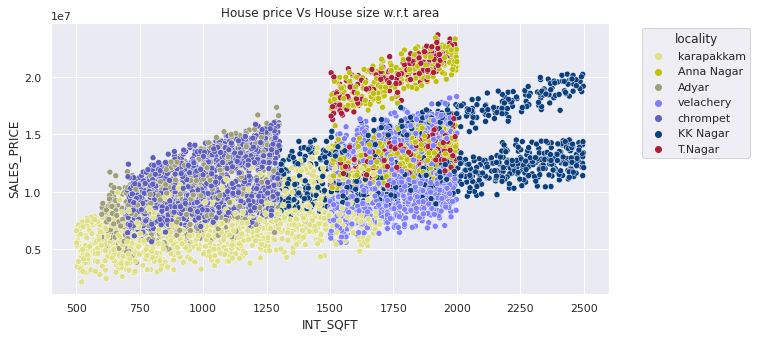

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='INT_SQFT', y='SALES_PRICE', hue='AREA', palette='gist_stern_r')
plt.title("House price Vs House size w.r.t area")
plt.legend(title='locality',bbox_to_anchor=(1.05, 1))
plt.show()

**sales price vs int_sqft with respect to area**

**1. House size follows linear relationship with house price in individual level as well as in cumulative level.**

**2. KK Nagar houses are comparatively bigger in size than houses in other areas.**

**3 .Karapakkam, Adyar has lower size houses.**

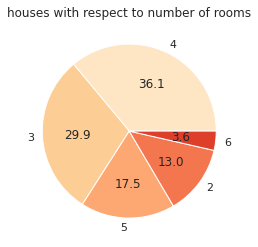

In [50]:
sns.set_palette('OrRd')
df.N_ROOM.value_counts().plot(kind='pie', autopct="%.1f")
plt.title("houses with respect to number of rooms")
plt.ylabel('')
plt.show()

**N_ROOM**


**1. Many people are intrested in buying homes with 4 and followed by 3 rooms.**


**2. Most people dont prefer homes with 6 rooms.**

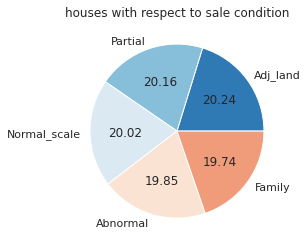

In [51]:
sns.set_palette('RdBu_r')
df.SALE_COND.value_counts().plot(kind='pie', autopct="%.2f")
plt.ylabel('')
plt.title("houses with respect to sale condition")
plt.show()

**houses sold with respect to sale condition.**

**1. They dont have much difference in house sales condition.**


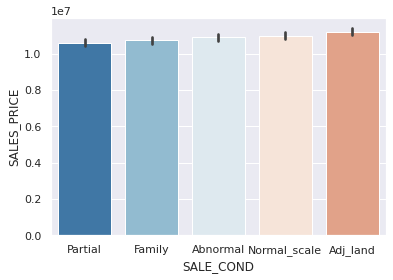

In [52]:
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

Sales_cond vs Sales_price graph
1. This graph shows a linear Trend.

2. It shows that adjacent lands has more sales price and partial lands has lower price.

2. Here we will be performing label encoding.

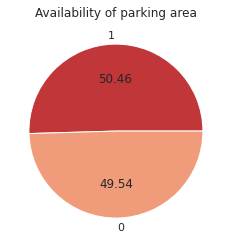

In [53]:
sns.set_palette('RdGy')
df.PARK_FACIL.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("Availability of parking area")
plt.ylabel('')
plt.show()

**Park facility.**

**1. There are nearly 50 percent of the homes with no parking facility and 50 percent with parking facility.**

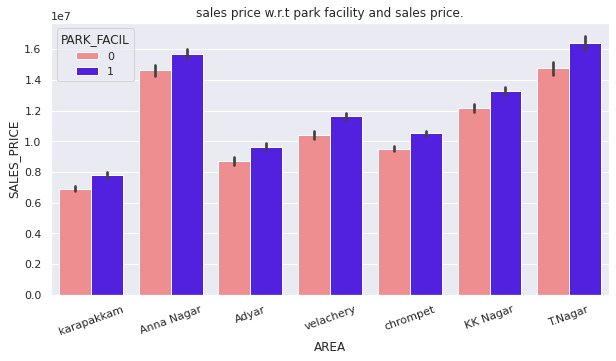

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x='AREA', y='SALES_PRICE', data=df, hue='PARK_FACIL', palette='gnuplot2_r')
plt.xticks(rotation=20)
plt.title("sales price w.r.t park facility and sales price.")
plt.show()

**sales price w.r.t park facility and sales price**


**1. Houses with parking facility are sold slightly more than that of the houses with no parking facility in each area.**

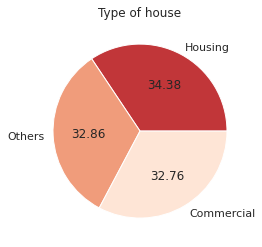

In [55]:
df.BUILDTYPE.value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Type of house")
plt.ylabel('')
plt.show()

**Types of house.**

**1. Housing buildings are sold more when compared with commercial and others.**

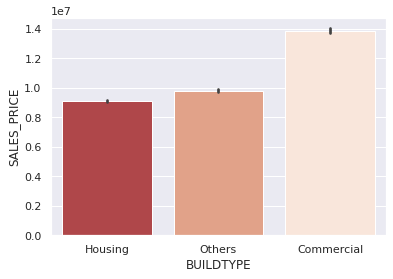

In [56]:
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

sales_price vs buildtype graph.
1.There is no linear trend in this graph.

2. It shows that commerical buildings are sold for more price.

3. We will be doing one-hot encoding here.

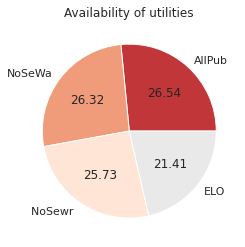

In [57]:
df.UTILITY_AVAIL.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("Availability of utilities")
plt.ylabel('')
plt.show()

**Houses with all public facilites are more.**

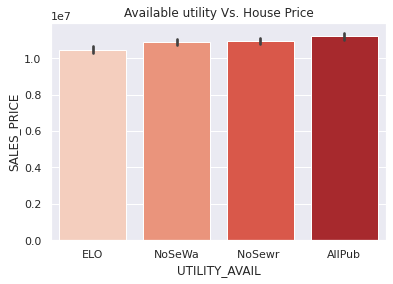

In [58]:
sns.barplot(x='UTILITY_AVAIL', y='SALES_PRICE', data=df, order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'], palette='Reds')
plt.title("Available utility Vs. House Price")
plt.show()

Utility_aval vs sales_price graph
1. It has a linear trend.

2. IT shows that the house which has all the public facility goes for good price.

3. so we can perform label encoding here

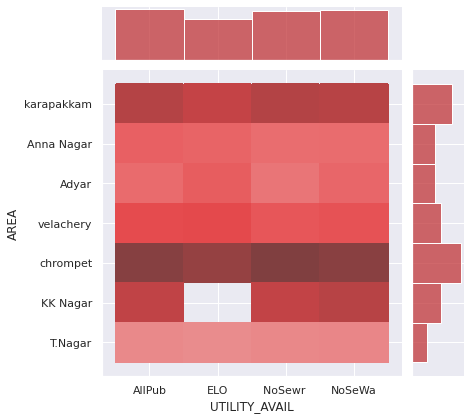

In [59]:
sns.jointplot(data=df, x='UTILITY_AVAIL',y='AREA', kind='hist');

**Utility available vs area.**

**1. This plot clearly shows that chrompet has more houses with all public facilities.**

**2.KK.nagar has no ELO available.**

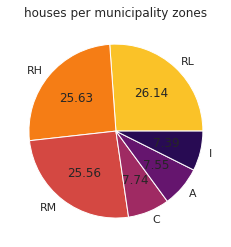

In [60]:
sns.set_palette('inferno_r')
df.MZZONE.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("houses per municipality zones")
plt.ylabel('')
plt.show()

    **A - agricultural land**
    **I - industrial land**
    **C - commercial land**
    **RH - resenditial highdensity**
    **RL - resenditial lowdensity**
    **RM - resenditial mediumdensity**

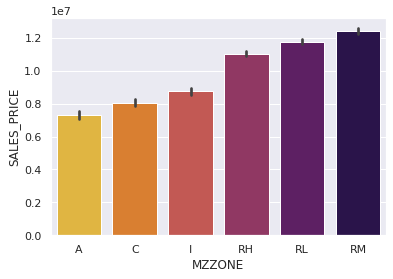

In [61]:
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

MZZONE vs sales_price graph
1. There is a linear trend in the graph.
2. It shows that the RM land goes for good price
3. We can perform label encoding but A,C,I has a steady linear trend but RH,RL,RM has different linear trend we will do label encoding with higher values for RH

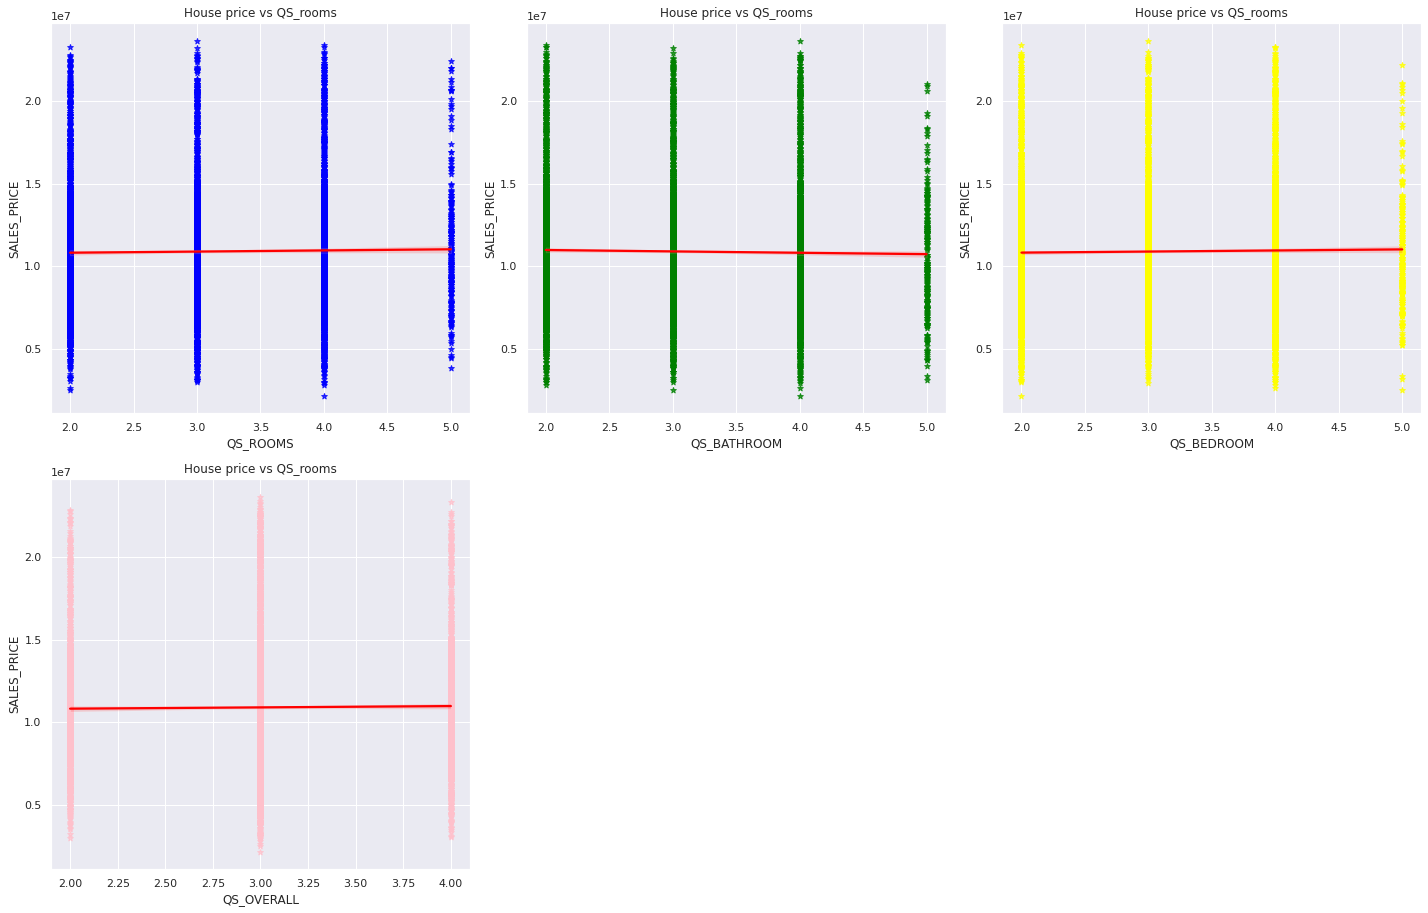

In [62]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.regplot(data=df, x='QS_ROOMS', y='SALES_PRICE', marker='*',scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("House price vs QS_rooms")

plt.subplot(432)
sns.regplot(data=df, x='QS_BATHROOM', y='SALES_PRICE', marker='*',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title("House price vs QS_rooms")

plt.subplot(433)
sns.regplot(data=df, x='QS_BEDROOM', y='SALES_PRICE', marker='*',scatter_kws={"color": "yellow"}, line_kws={"color": "red"})
plt.title("House price vs QS_rooms")

plt.subplot(434)
sns.regplot(data=df, x='QS_OVERALL', y='SALES_PRICE', marker='*',scatter_kws={"color": "pink"}, line_kws={"color": "red"})
plt.title("House price vs QS_rooms")
plt.tight_layout()

**All the masked data set does not follows linear relation with the target(Sales_price)**

# Data Encoding.

In [63]:
df.AREA = df.AREA.map({'karapakkam':1, 'Anna Nagar':6, 'Adyar':2, 'velachery':4, 'chrompet':3,
       'T.Nagar':7, 'KK Nagar':5})

In [64]:
df.SALE_COND = df.SALE_COND.map({'Abnormal':3, 'Family':2, 'Partial':1, 'Adj_land':5, 'Normal_scale':4})

In [65]:
from sklearn.preprocessing import LabelEncoder
dx = df.BUILDTYPE
dft = pd.get_dummies(dx)
df = pd.concat([df,dft],axis=1)
del df['BUILDTYPE']

In [66]:
df.UTILITY_AVAIL =df.UTILITY_AVAIL.map({'AllPub':4, 'ELO':1, 'NoSewr ':3, 'NoSeWa':2})

In [67]:
df.MZZONE = df.MZZONE.map({'A':1, 'RH':5, 'RL':6, 'I':3, 'C':2, 'RM':7})

# **since all encoding and visuvalization is done we will be performing machine learning algorithim to predict values and summit a final report.**

In [68]:
a = df.pop('SALES_PRICE')
df.insert(19,'SALES_PRICE',a)
df.head()

,AREA,INT_SQFT,House_age,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Commercial,Housing,Others,SALES_PRICE
0,1,1004,44,131,1,1,3,3,1,4,3,1,4,3,4,4,1,0,0,7600000
1,6,1986,11,26,2,1,5,3,0,4,2,5,4,4,2,3,1,0,0,21717770
2,2,909,20,70,1,1,3,3,1,1,2,6,4,3,2,3,1,0,0,13159200
3,4,1855,22,14,3,2,5,2,0,3,3,3,4,3,3,4,0,0,1,9630290
4,1,1226,30,84,1,1,3,3,1,4,2,2,3,2,4,3,0,0,1,7406250


In [69]:
# splitting the data for target and feature.
x = df.drop(['SALES_PRICE'], axis=1)
y = df.SALES_PRICE

**Train Test split.**

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=3)

**Scaling the data.**

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Machine Learning:**


   **1. It's a supervised problem.**


   **2. The target value is continious.**


   **3. So for better predictions we will be using multiple models here.**

   **1st model : Linear Regression.**


   **2nd model : KNN Regression.**


   **3rd model : Decison tree.**


   **4th model : Random Forest.**

# Linear regression

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [73]:
print('value of parameter c :',regressor.intercept_)

value of parameter c : 10879760.767540004


In [74]:
m = regressor.coef_

In [75]:
dx = pd.DataFrame(m,['AREA', 'INT_SQFT', 'House_age', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'Commercial', 'Housing', 'Others'], columns=['coefficient'])
dx   

,coefficient
AREA,1.077030e+06
INT_SQFT,6.542322e+05
House_age,-2.222438e+05
DIST_MAINROAD,3.461595e+03
N_BEDROOM,-1.210731e+06
N_BATHROOM,1.084312e+05
N_ROOM,1.715194e+06
SALE_COND,2.251401e+05
PARK_FACIL,5.114240e+05
UTILITY_AVAIL,5.518540e+04


In [76]:
y_pred = regressor.predict(x_test)

**Evaluation metrices**

In [77]:
print("Training data score for linear regression: {:.2f}".format(regressor.score(x_train, y_train)))
print("Test data score for linear regression: {:.2f}".format(regressor.score(x_test, y_test)))

Training data score for linear regression: 0.91
Test data score for linear regression: 0.91


In [78]:
lr = LinearRegression().fit(x_train, y_train)

In [79]:
from sklearn import metrics
a = metrics.r2_score(y_test, y_pred)
print('R2 value of linear regression {:.2f}'.format(a))

R2 value of linear regression 0.91


In [80]:
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))

MSE: 1291715103486.61
MAE: 884582.92


**The linear Regression model has a really good r2 score of 0.91 and MSE of 1291715103486.61 and MAE of 884582.92**

In [81]:
lr_pre = pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})

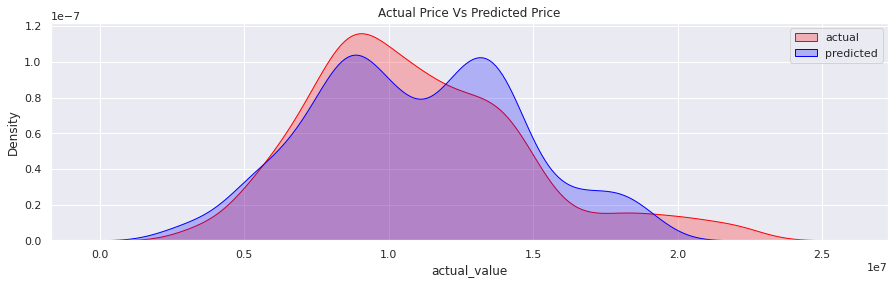

In [82]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=lr_pre, x='actual_value', label='actual', color = 'red',shade=True)
sns.kdeplot(data=lr_pre, x='predicted_value', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

# KNN Regression

**cross validation score to find best value of k**

In [83]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  clf = KNeighborsRegressor(n_neighbors=i) 
  clf.fit(x_test,y_test) # train the model
  print("cross-validation score for i=",i,'is', np.mean(cross_val_score(clf, x_test,y_test, cv=10)))

cross-validation score for i= 1 is 0.7311232932170001
cross-validation score for i= 2 is 0.8199530510186648
cross-validation score for i= 3 is 0.842502780074331
cross-validation score for i= 4 is 0.8535369403640244
cross-validation score for i= 5 is 0.8512061944472713
cross-validation score for i= 6 is 0.8568779005959094
cross-validation score for i= 7 is 0.8597230778799585
cross-validation score for i= 8 is 0.8581228867009865
cross-validation score for i= 9 is 0.8556752751569203
cross-validation score for i= 10 is 0.8552511914331002
cross-validation score for i= 11 is 0.8538431724124335
cross-validation score for i= 12 is 0.8530491916299997
cross-validation score for i= 13 is 0.8519846773509991
cross-validation score for i= 14 is 0.8515916010747885
cross-validation score for i= 15 is 0.8493844127458716
cross-validation score for i= 16 is 0.8491655520583409
cross-validation score for i= 17 is 0.8484396453925263
cross-validation score for i= 18 is 0.8474066851221668
cross-validation sco

In [84]:
# K = 7 gives the best cross validation score so we will be using that to predict.
knn = KNeighborsRegressor(7)
knn.fit(x_train,y_train)
k_pred = knn.predict(x_test)

**Evalution metric**

In [85]:
b = metrics.r2_score(y_test, k_pred)

In [86]:
print("KNN regressor train score: {:.2f}".format(knn.score(x_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn.score(x_test, y_test)))
print("KNN r2 score: {:.2f}".format(b))

KNN regressor train score: 0.92
KNN regressor test score: 0.89
KNN r2 score: 0.89


**It has really good r2 value.**

In [87]:
k = pd.DataFrame({'actual_value':y_test,'predicted_value':k_pred})

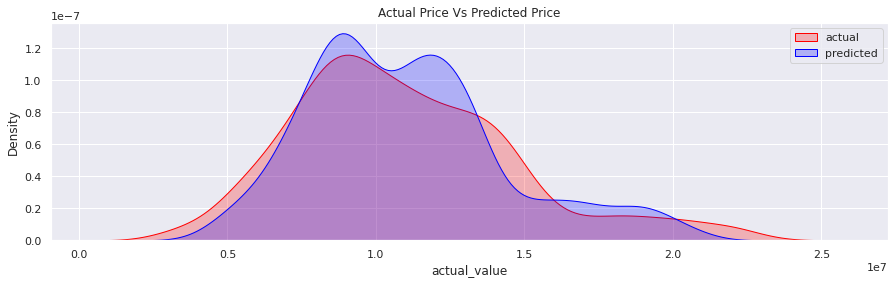

In [88]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=k, x='actual_value', label='actual', color = 'red',shade=True)
sns.kdeplot(data=k, x='predicted_value', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

**Decission Tree Regressor**

In [89]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
q = dt.predict(x_test)

**Evaluation metrices**

In [90]:
print("Training data score for DT: {:.2f}".format(dt.score(x_train, y_train)))
print("Test data score for DT: {:.2f}".format(dt.score(x_test, y_test)))

Training data score for DT: 1.00
Test data score for DT: 0.97


In [91]:
c = metrics.r2_score(y_test, q)

In [92]:
print("KNN r2 score: {:.2f}".format(c))

KNN r2 score: 0.97


**It has a excellent r2 value :)**

**Feature Importance.**

In [120]:
impo = dt.feature_importances_
list(zip(impo,x.columns))

[(0.4765979891622068, 'AREA'),
 (0.10337380577881573, 'INT_SQFT'),
 (0.004205412688423945, 'House_age'),
 (0.00182114089329393, 'DIST_MAINROAD'),
 (0.00017828106977385848, 'N_BEDROOM'),
 (0.01172369352863581, 'N_BATHROOM'),
 (0.00013219345655891598, 'N_ROOM'),
 (0.002124072800910546, 'SALE_COND'),
 (0.016071369468225367, 'PARK_FACIL'),
 (0.001028696917131427, 'UTILITY_AVAIL'),
 (0.009869136957382363, 'STREET'),
 (0.03839999268268742, 'MZZONE'),
 (0.0006640231858254195, 'QS_ROOMS'),
 (0.0005560641390315896, 'QS_BATHROOM'),
 (0.0007065063917012038, 'QS_BEDROOM'),
 (0.00029607422546995945, 'QS_OVERALL'),
 (0.3274718660981778, 'Commercial'),
 (0.002286899615590922, 'Housing'),
 (0.002492780940156986, 'Others')]

**It seems like AREA , Commercial and INT_sqft are the most important features.**

In [93]:
print("MSE for DT: {:.2f}".format(metrics.mean_squared_error(y_test, q)))
print("MAE for DT: {:.2f}".format(metrics.mean_absolute_error(y_test, q)))

MSE for DT: 489017892737.59
MAE for DT: 548744.88


In [94]:
k = pd.DataFrame({'actual_value':y_test,'predicted_value':q})

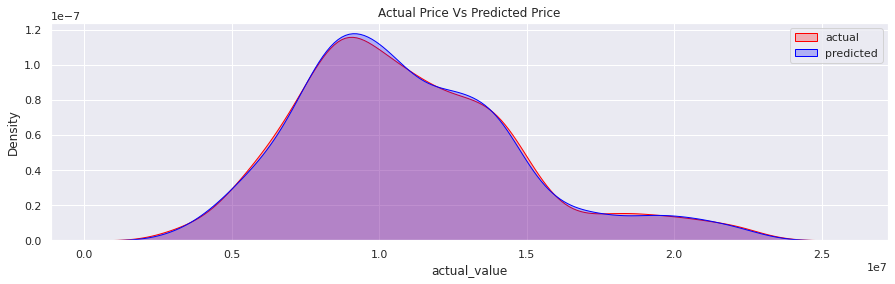

In [95]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=k, x='actual_value', label='actual', color = 'red',shade=True)
sns.kdeplot(data=k, x='predicted_value', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

**Random Forest.**

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13]:
  clf = RandomForestRegressor(max_depth=i) 
  clf.fit(x_test,y_test) # train the model
  print("cross-validation score for i=",i,'is', np.mean(cross_val_score(clf, x_test,y_test, cv=10)))

cross-validation score for i= 1 is 0.36438911820952574
cross-validation score for i= 2 is 0.6715611564717051
cross-validation score for i= 3 is 0.8164859013326742
cross-validation score for i= 4 is 0.8985432792665105
cross-validation score for i= 5 is 0.9317025173845677
cross-validation score for i= 6 is 0.95095122460075
cross-validation score for i= 7 is 0.9607484321942265
cross-validation score for i= 8 is 0.9658300168114057
cross-validation score for i= 9 is 0.9682972330978176
cross-validation score for i= 10 is 0.9694577355104459
cross-validation score for i= 11 is 0.9701600705742619
cross-validation score for i= 12 is 0.9702817525866948
cross-validation score for i= 13 is 0.9703333731776063


In [98]:
rf_regressor = RandomForestRegressor(max_depth=13, n_estimators=100,max_features='sqrt', random_state=0)
rf_regressor.fit(x_train, y_train)
rf_y_predict = rf_regressor.predict(x_test)

**Evalution metrices**

In [99]:
print("Training data score for RF: {:.2f}".format(rf_regressor.score(x_train, y_train)))
print("Test data score for RF: {:.2f}".format(rf_regressor.score(x_test, y_test)))

Training data score for RF: 0.99
Test data score for RF: 0.98


In [100]:
d = metrics.r2_score(y_test,rf_y_predict)

In [101]:
print("RF r2 score: {:.2f}".format(d))

RF r2 score: 0.98


**we got the r2 value of around 98 percent.**

In [102]:
print("MSE for RF: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("MAE for RF: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

MSE for RF: 296708806199.51
MAE for RF: 431293.27


**Feature importance.**

In [121]:
impo = rf_regressor.feature_importances_
list(zip(impo,x.columns))

[(0.22463759727163413, 'AREA'),
 (0.15889435056582554, 'INT_SQFT'),
 (0.01333608380823686, 'House_age'),
 (0.0080195030959953, 'DIST_MAINROAD'),
 (0.03556372232970025, 'N_BEDROOM'),
 (0.009323753644307103, 'N_BATHROOM'),
 (0.11077968067336932, 'N_ROOM'),
 (0.005430126216232546, 'SALE_COND'),
 (0.012333348670187328, 'PARK_FACIL'),
 (0.004177083291639723, 'UTILITY_AVAIL'),
 (0.010174165477117374, 'STREET'),
 (0.07600841720853424, 'MZZONE'),
 (0.0029661166868169522, 'QS_ROOMS'),
 (0.0029471189685423083, 'QS_BATHROOM'),
 (0.0028554143312879976, 'QS_BEDROOM'),
 (0.002184131443418025, 'QS_OVERALL'),
 (0.2293002472656865, 'Commercial'),
 (0.05663555302008199, 'Housing'),
 (0.03443358603138636, 'Others')]

**It seems like commercial , Area , INT_SQFT and N_Rooms are the most important features.**

In [103]:
k = pd.DataFrame({'actual_value':y_test,'predicted_value': rf_y_predict})

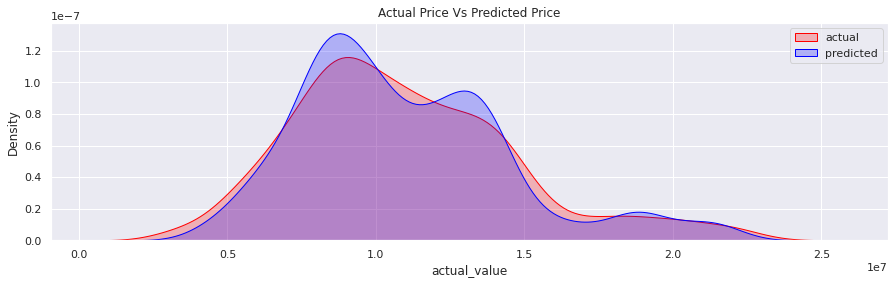

In [104]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=k, x='actual_value', label='actual', color = 'red',shade=True)
sns.kdeplot(data=k, x='predicted_value', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

**comparing all the models we have used.**

In [105]:
models = pd.DataFrame({'model_name':['LinearRegression','KNN','DecissionTree','RandomForest'],'r2_score':[a,b,c,d]})
models

,model_name,r2_score
0,LinearRegression,0.909823
1,KNN,0.892535
2,DecissionTree,0.965861
3,RandomForest,0.979286


# Final Report and Conslusion.


**1. More number of houses are sold in chrompet and karapakkam.**

**2. Houses in chrompet and karapakkam are not that expensive when compared with other areas.**

**3. Houses in T.Nagar are highly expensive and sold less when compared to other houses.**

**4. Houses in karapakkam and chrompet has more 1 and 2 bedrooms and sold more when comparing with others.**

**5. Houses in karapakkam , adayar and chrompet are small in size and KK Nagar has comparitively bigger houses.**

**6. Price of the houses increases when number of rooms are more.**

**7.Adjacent lands prices are really high when compared to others.**

**8. Houses with parking facilites are sold more when compared to houses with non parking facilities.**

**9. Residential low density zone houses has more parking facilities houses.**

**10. Commercial buildings are expensive than other type of buildings.**

**11. Among all the houses sold only 26.54% of houses has all the public facilities.**

**12. Houses with all the public facilites are sold comparively high.**

**13. Chrompet has highest number of houses with all the public facilities.**

**14. 36.18% houses have paved roads , 35.45 houses have gravel roads and 28.37 houses have no road access.**

**15. Most commercial houses are of paved street, and most house type houses has gravel street.**


**16. Among houses with no access, number of housing type houses are more.**

**17. Most number of houses are from Residential low density zone, Residential high density zone and Resenditial medium density zone.**

**18. House price increases with the municipality zone.**

**19. Resenditial medium density zone has most expensive houses, whereas Agricultural zone has cheapest houses.**

**20. Theres are less aged houses, i.e. less number of houses age more than 35 years.**


# Actions that has to be taken by builders and sellers.

**! Type of the building and available utilities effects the price of the houses.**

**! Consider building a commercial space building so that you could sell more houses.**

**! In Karapakkam the streets have limited or no access, which causes the house price to drop in future.**

**! When building a prpoerty consider having gravel or paved road access to the property.**

**! While building a property build with atleast 2500 sqft cause most people prefer buildings with minimum of 2500 sqft.**

**! Build houses with minimun of 2 bathrooms and 3 or 2 bedrooms cause most people prefer that.**

**! Sell more property which is not more than 10-12 years old.**


# Sellers Bargain

**If the property is Commercial building and in T-Nagar and in the Residential medium density zone with property age less then 10 years and has more than 2 bathrooms and more than 3 bedrooms the owner should not hesitate asking or bargain for a higher amount cause from our analysis we found these are the factors that boosts the house price.**